In [44]:
import requests
import apimoex
import ts2vg as ts
from igraph import *
import numpy as np
import networkx as nx
import igraph as ig
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd

#### TASK 1

<Axes: >

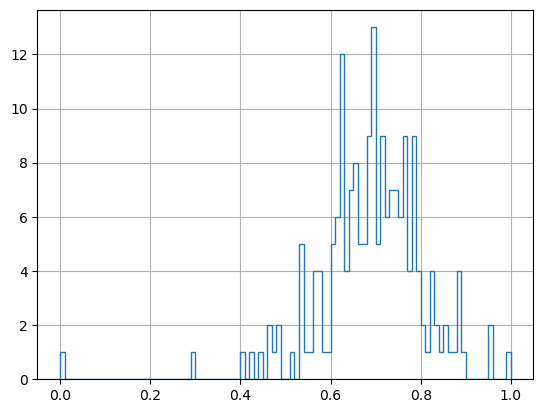

In [46]:
# download MOEX data , calculate normilized returns
# display it into visibility graph: regular and horizontal
# plot and compare

with requests.Session() as session:
    data = apimoex.get_board_history(session, 'GAZP')
    df = pd.DataFrame(data).drop(columns=['VALUE', 'BOARDID'])
    df.set_index('TRADEDATE', inplace=True)
    df.index = pd.to_datetime(df.index)
    df = df[pd.to_datetime('2023-01-01'):]
    
df['log_return'] = df['CLOSE'].pct_change()
df = df.dropna()
df['norm_return'] = (df['log_return'].max() - df['log_return']) / (df['log_return'].max() - df['log_return'].min())
df['norm_return'].hist(histtype='step', bins=100)

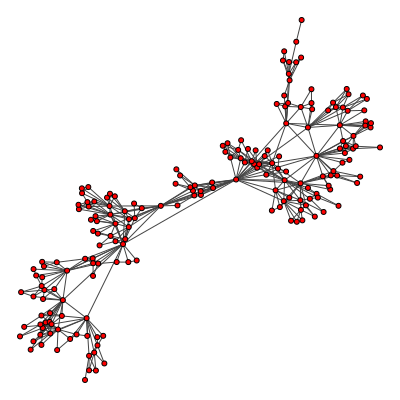

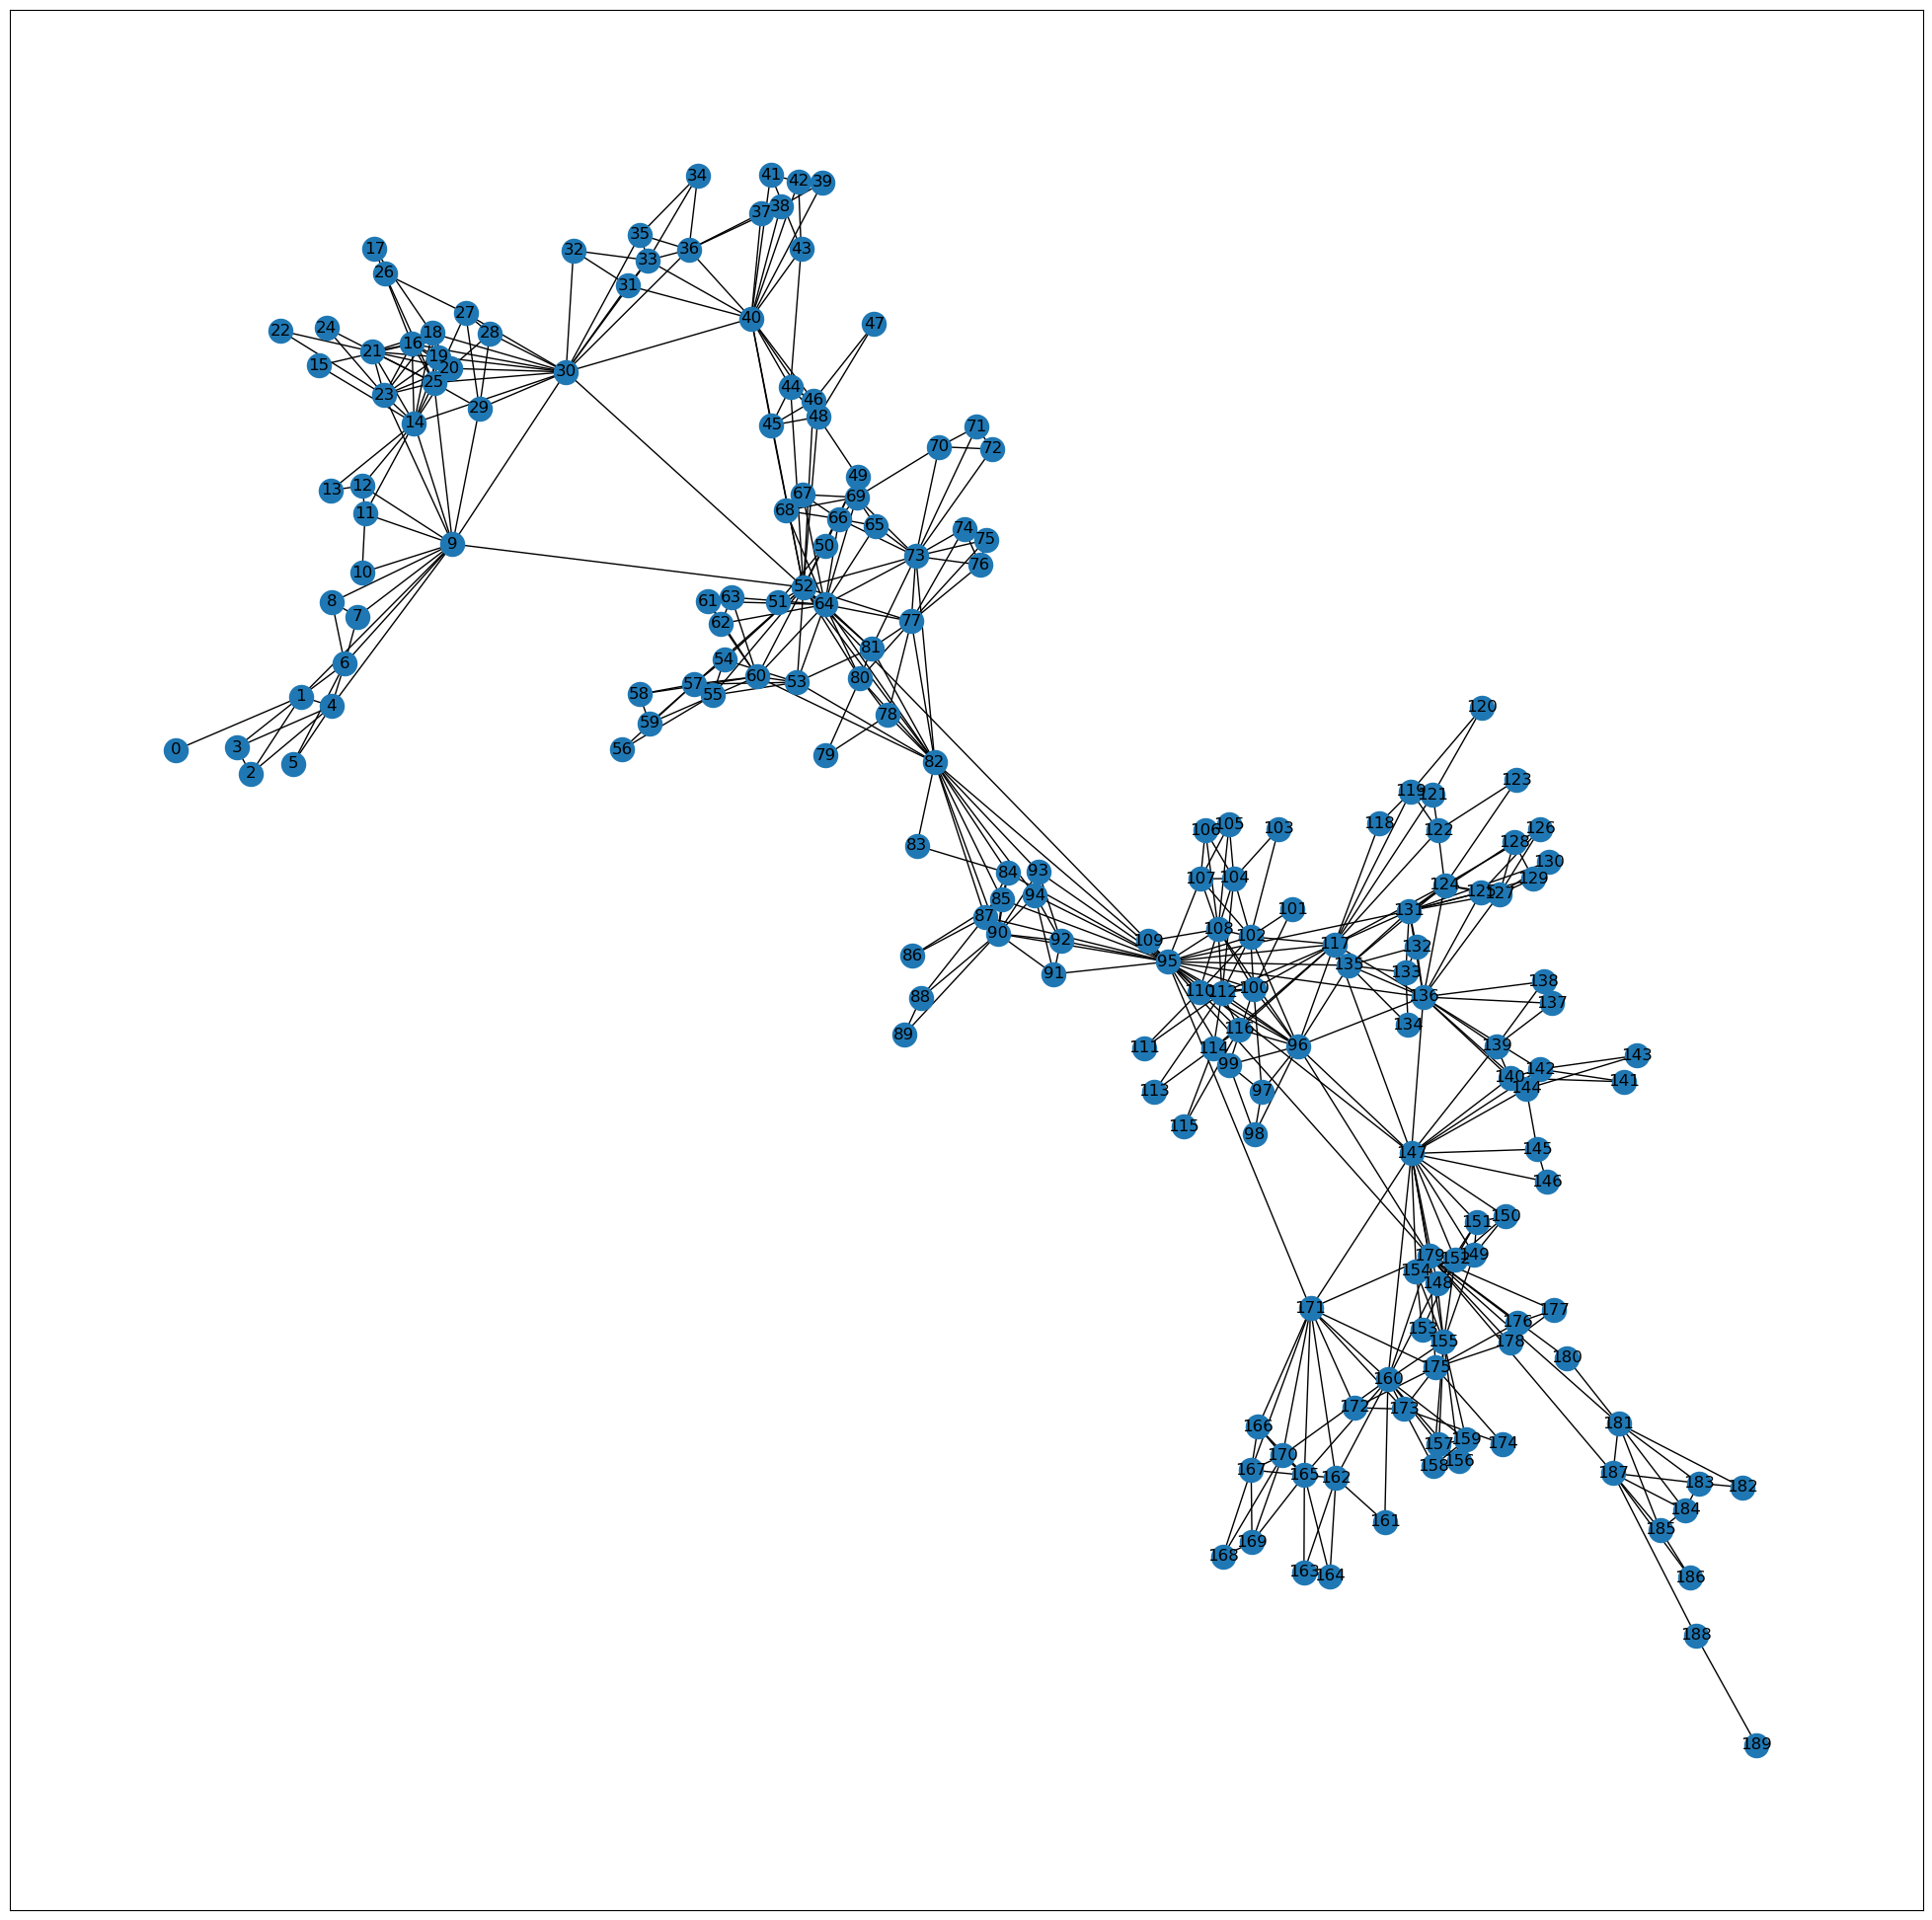

<Figure size 200x200 with 0 Axes>

In [49]:
vg = ts.NaturalVG()
vg.build(df['norm_return'])

ivg = vg.as_igraph()
nxvg = vg.as_networkx()

plt.figure(figsize =(25, 25))
nx.draw_networkx(nxvg, with_labels = True)

# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(ivg,
        vertex_size=5,
        #vertex_label=g.vs['names'],
        #edge_label=g.es['weight'],
        bbox=(400, 400)
        )

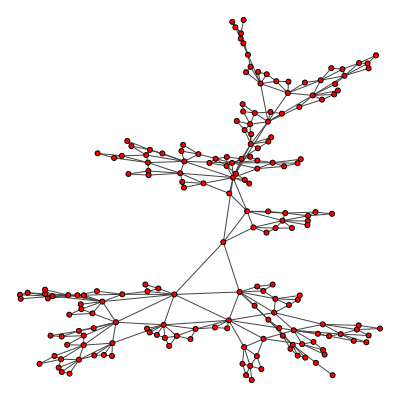

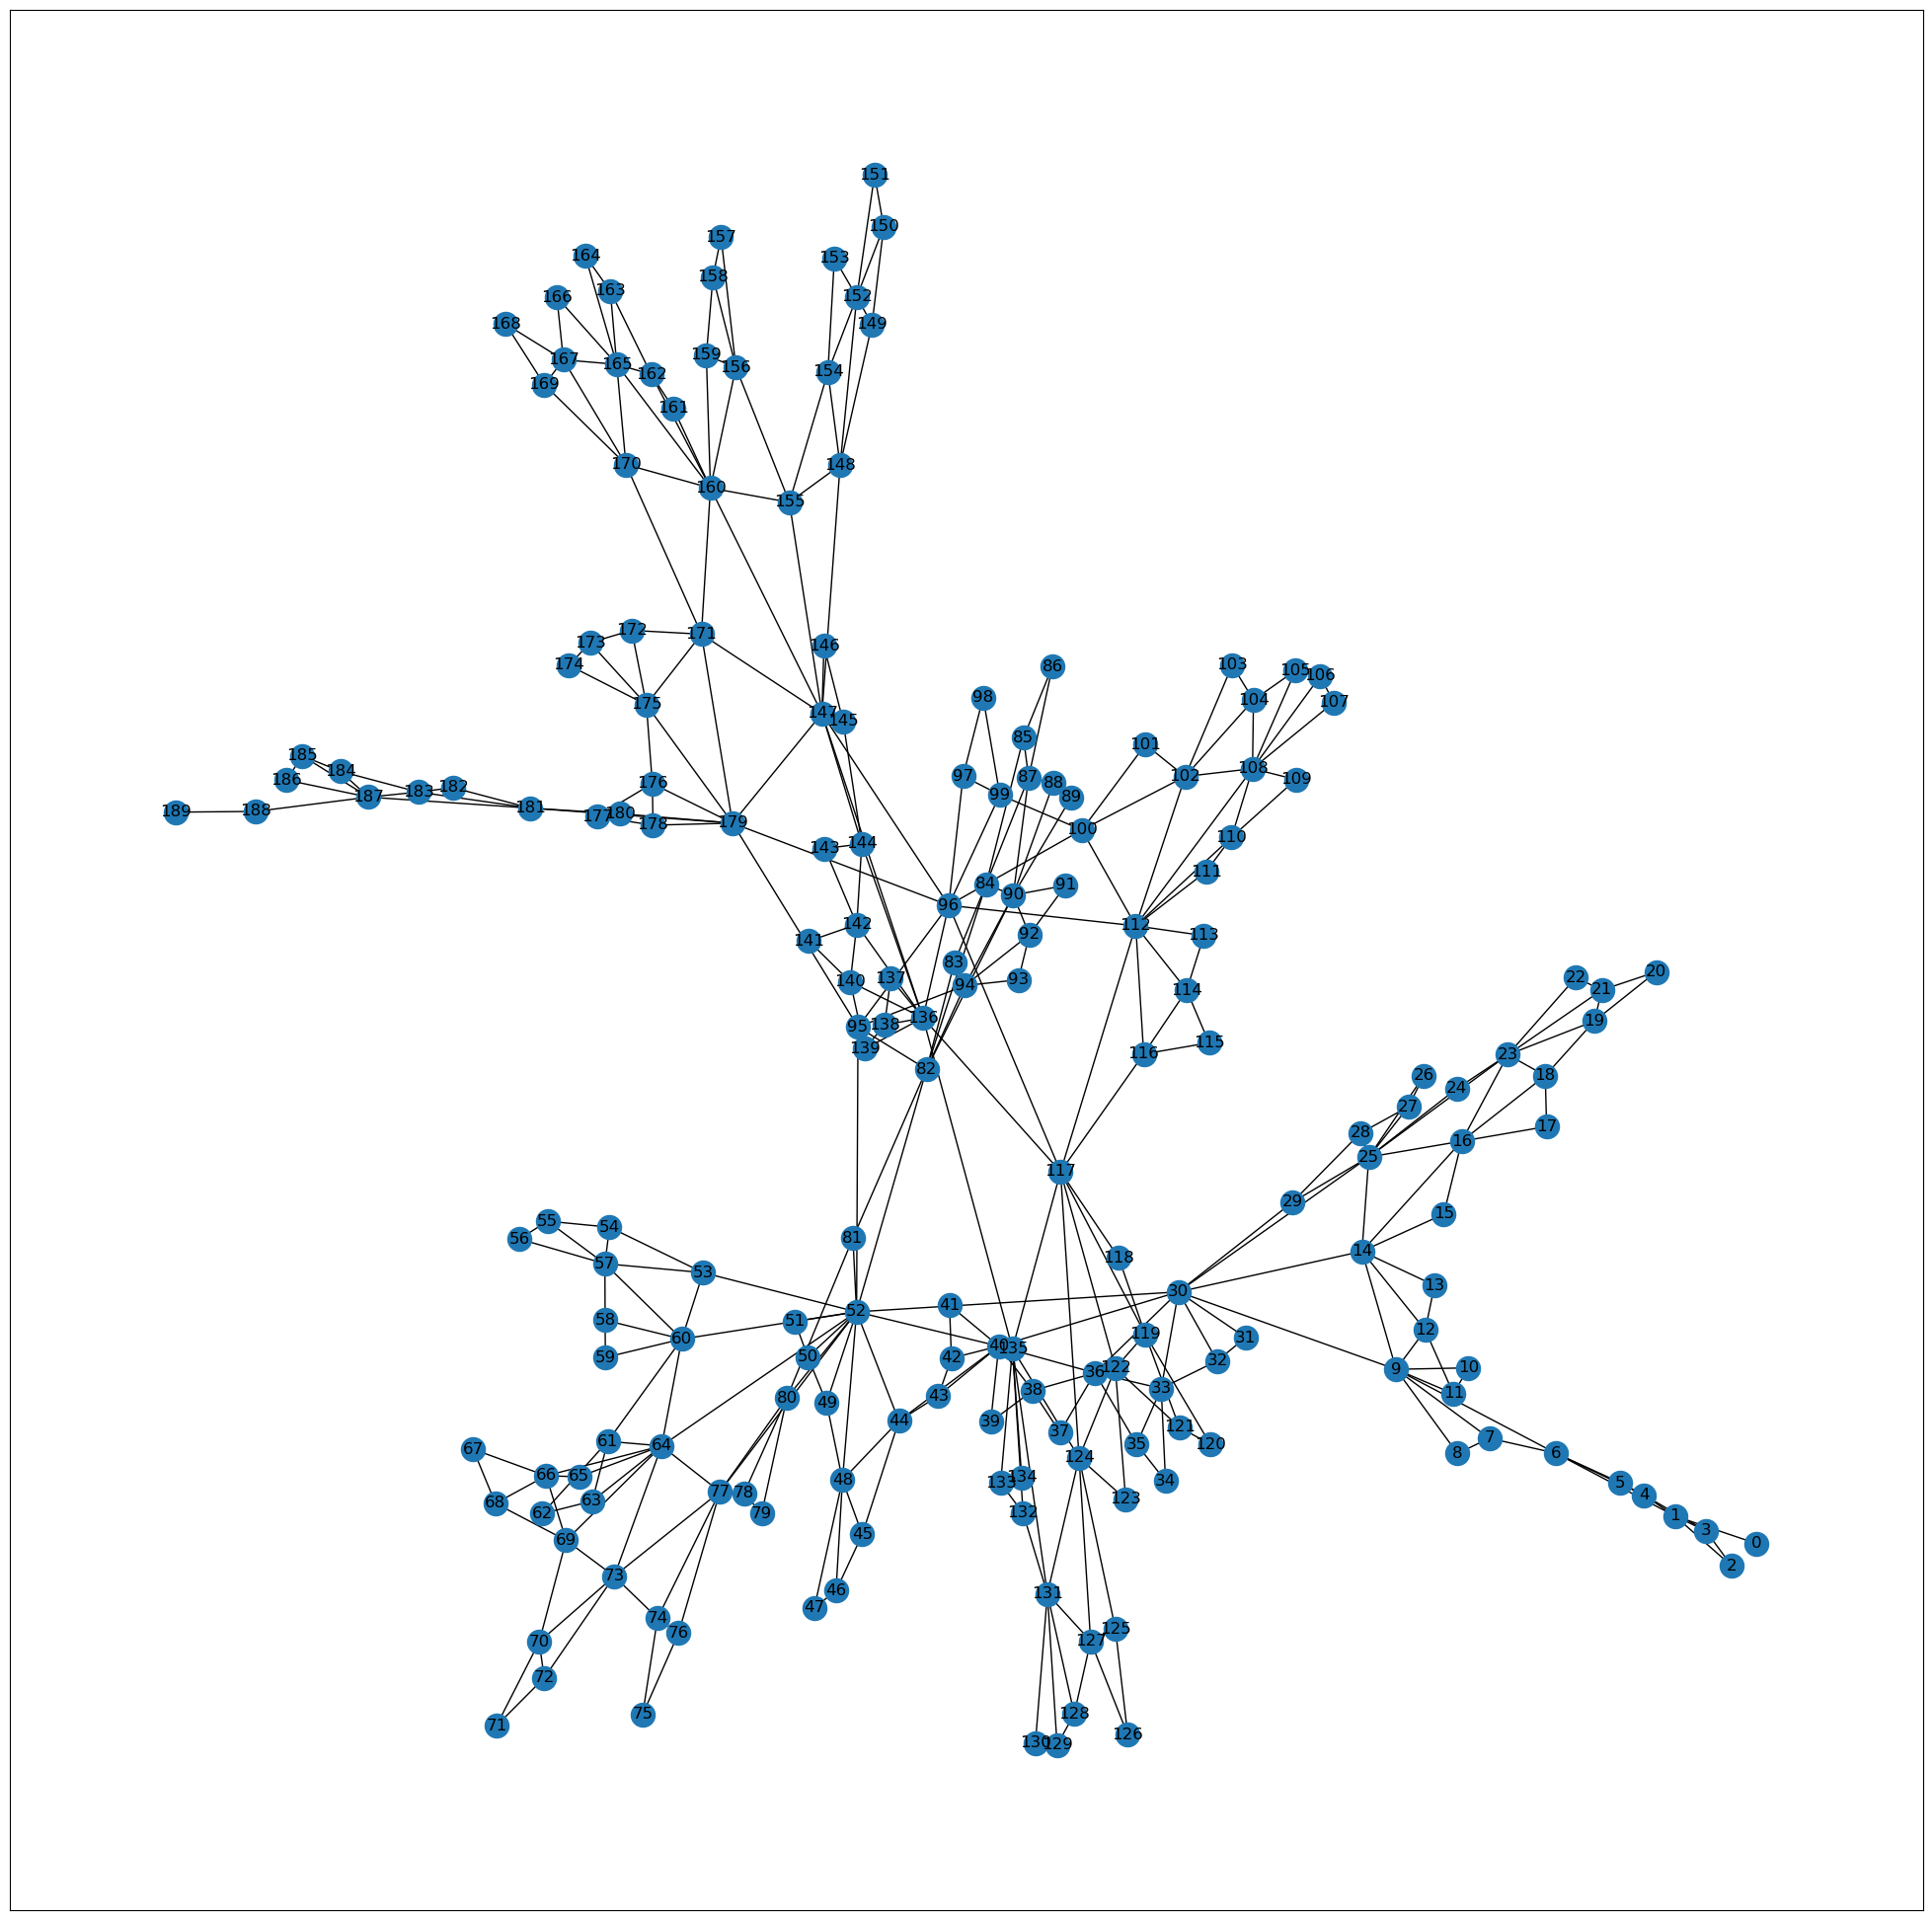

<Figure size 200x200 with 0 Axes>

In [51]:
vg = ts.HorizontalVG()
vg.build(df['norm_return'])

ihg = vg.as_igraph()
nxhg = vg.as_networkx()

plt.figure(figsize =(25, 25))
nx.draw_networkx(nxhg, with_labels = True)

# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(ihg,
        vertex_size=5,
        #vertex_label=g.vs['names'],
        #edge_label=g.es['weight'],
        bbox=(400, 400)
        )

In [62]:
# compare two ways constructed graphs
print(f'Compare according adjacency matrices : {list(nxhg.adjacency()) == list(nxvg.adjacency())}')

Compare according adjacency matrices : True


#### TASK 2

In [104]:
data_dict = {}
with requests.Session() as session:
    data_dict['GAZP'] = pd.DataFrame(apimoex.get_board_history(session, 'GAZP'))
    data_dict['SBER'] = pd.DataFrame(apimoex.get_board_history(session, 'SBER'))

In [105]:
data_dict['GAZP'].set_index('TRADEDATE', inplace=True)
data_dict['GAZP'].index = pd.to_datetime(data_dict['GAZP'].index)

data_dict['SBER'].set_index('TRADEDATE', inplace=True)
data_dict['SBER'].index = pd.to_datetime(data_dict['SBER'].index)

In [106]:
data_dict['GAZP'].join(data_dict['SBER'], on=data_dict['SBER'].index, )

KeyError: DatetimeIndex(['2013-03-25', '2013-03-26', '2013-03-27', '2013-03-28',
               '2013-03-29', '2013-04-01', '2013-04-02', '2013-04-03',
               '2013-04-04', '2013-04-05',
               ...
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-10-02', '2023-10-03'],
              dtype='datetime64[ns]', name='TRADEDATE', length=2655, freq=None)